In [106]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/lard0503/premierleaguematches/main/matches.csv'
df = pd.read_csv(url)
print(df.head()) #primeros 5 registros de cada columna



   Unnamed: 0        date           time            comp        round  day  \
0           0  2020-09-21  20:15 (21:15)  Premier League  Matchweek 2  Mon   
1           2  2020-09-27  16:30 (17:30)  Premier League  Matchweek 3  Sun   
2           4  2020-10-03  17:30 (18:30)  Premier League  Matchweek 4  Sat   
3           5  2020-10-17  17:30 (18:30)  Premier League  Matchweek 5  Sat   
4           7  2020-10-24  12:30 (13:30)  Premier League  Matchweek 6  Sat   

  venue result  gf  ga  ...  match report  notes  sh  sot  dist fk pk pkatt  \
0  Away      W   3   1  ...  Match Report    NaN  13    8  21.1  2  1     1   
1  Home      L   2   5  ...  Match Report    NaN  16    5  19.8  1  0     0   
2  Away      D   1   1  ...  Match Report    NaN  23    1  18.2  1  0     0   
3  Home      W   1   0  ...  Match Report    NaN  13    5  17.7  0  0     0   
4  Away      D   1   1  ...  Match Report    NaN  14    7  20.9  1  0     0   

  season             team  
0   2024  Manchester City  


In [107]:
print(df.info()) #Número de registros y tipo de variables
print(df.describe()) #Estadísticas de las variables numéricas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4788 non-null   int64  
 1   date          4788 non-null   object 
 2   time          4788 non-null   object 
 3   comp          4788 non-null   object 
 4   round         4788 non-null   object 
 5   day           4788 non-null   object 
 6   venue         4788 non-null   object 
 7   result        4788 non-null   object 
 8   gf            4788 non-null   int64  
 9   ga            4788 non-null   int64  
 10  opponent      4788 non-null   object 
 11  xg            4788 non-null   float64
 12  xga           4788 non-null   float64
 13  poss          4788 non-null   int64  
 14  attendance    3155 non-null   float64
 15  captain       4788 non-null   object 
 16  formation     4788 non-null   object 
 17  referee       4788 non-null   object 
 18  match report  4788 non-null 

In [108]:
#venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,fk,pk,pkatt,season,team
columnas_importantes = ['venue','result','gf','ga','opponent','xg','xga','poss','sh','sot','fk','pk','pkatt','season','team']
dataTrans = df[columnas_importantes] #creamos un nuevo dataframe con las columnas importantes
print(dataTrans.head()) #imprimimos las primeras 5 filas del nuevo dataframe para confirmar que esta bien

  venue result  gf  ga        opponent   xg  xga  poss  sh  sot  fk  pk  \
0  Away      W   3   1          Wolves  1.9  0.6    65  13    8   2   1   
1  Home      L   2   5  Leicester City  0.9  2.9    72  16    5   1   0   
2  Away      D   1   1    Leeds United  1.2  2.4    49  23    1   1   0   
3  Home      W   1   0         Arsenal  1.3  0.9    58  13    5   0   0   
4  Away      D   1   1        West Ham  1.0  0.3    69  14    7   1   0   

   pkatt  season             team  
0      1    2024  Manchester City  
1      0    2024  Manchester City  
2      0    2024  Manchester City  
3      0    2024  Manchester City  
4      0    2024  Manchester City  


In [109]:
missing_values = dataTrans.isnull().sum() #contamos los valores nulos en cada calumna
print(missing_values[missing_values >= 0]) #imprimimos la cantidad de valores nulos por columna

venue       0
result      0
gf          0
ga          0
opponent    0
xg          0
xga         0
poss        0
sh          0
sot         0
fk          0
pk          0
pkatt       0
season      0
team        0
dtype: int64


In [110]:
print('No tenemos valores nulos en las columnas')

No tenemos valores nulos en las columnas


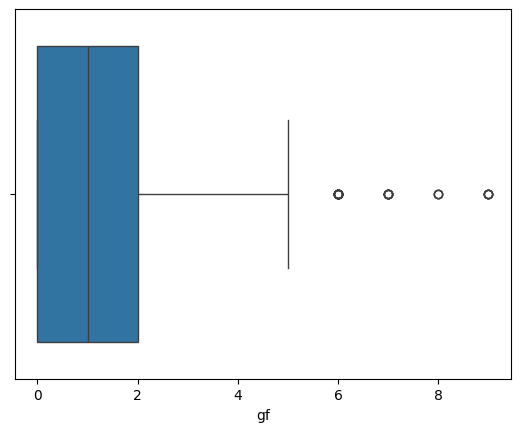

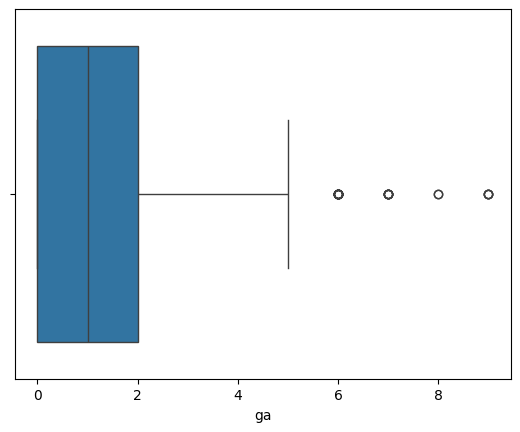

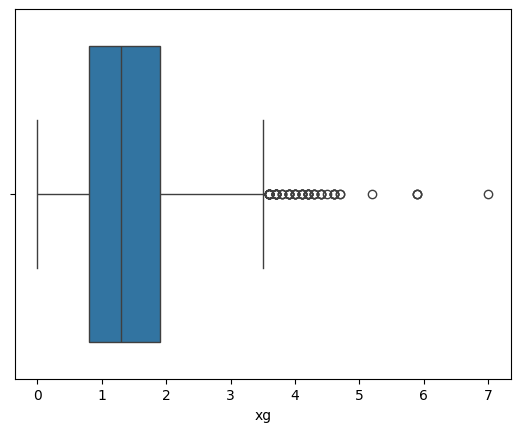

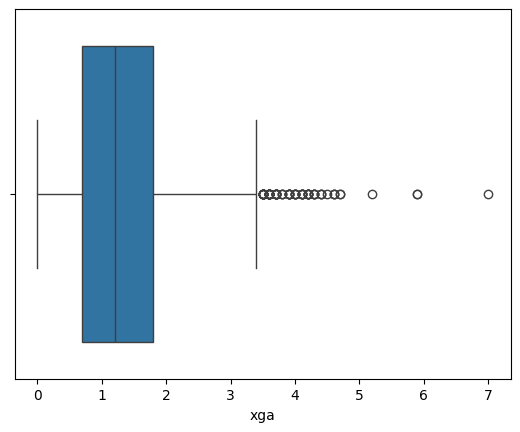

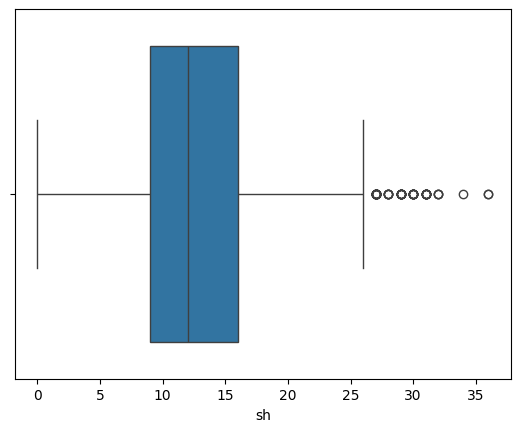

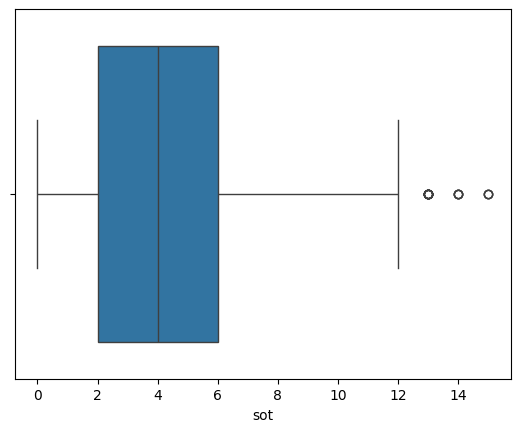

In [111]:
#Detectar y tratar los outliers
import matplotlib.pyplot as plt
import seaborn as sns
#se seleccionan las columnas numéricas y con variales continuas

sns.boxplot(x=df['gf'])
plt.show()
sns.boxplot(x=df['ga'])
plt.show()
sns.boxplot(x=df['xg'])
plt.show()
sns.boxplot(x=df['xga'])
plt.show()
sns.boxplot(x=df['sh'])
plt.show()
sns.boxplot(x=df['sot'])
plt.show()




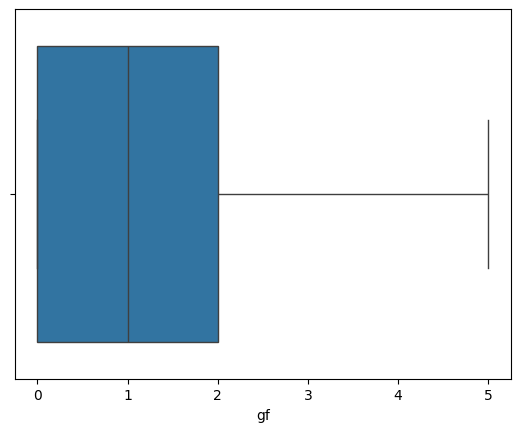

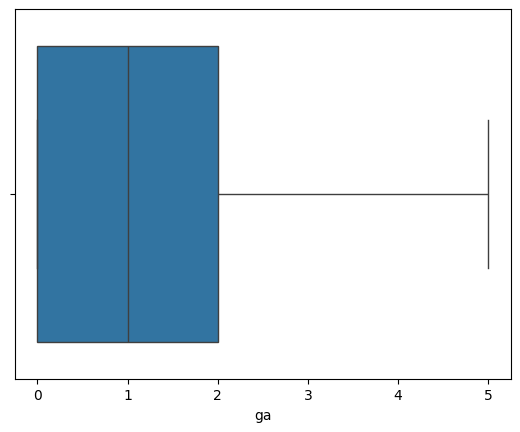

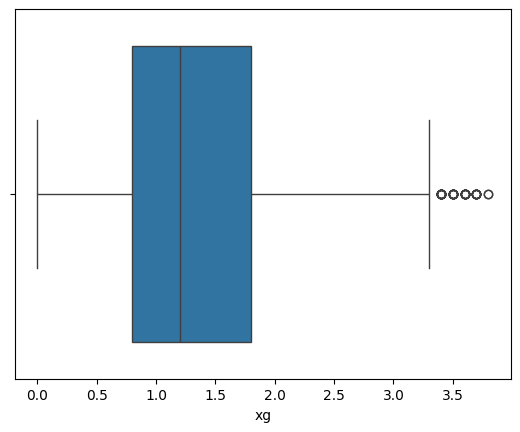

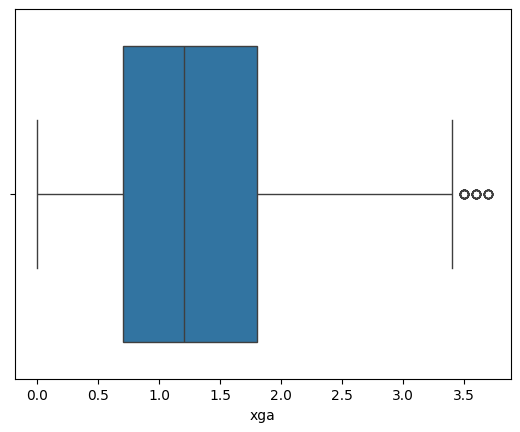

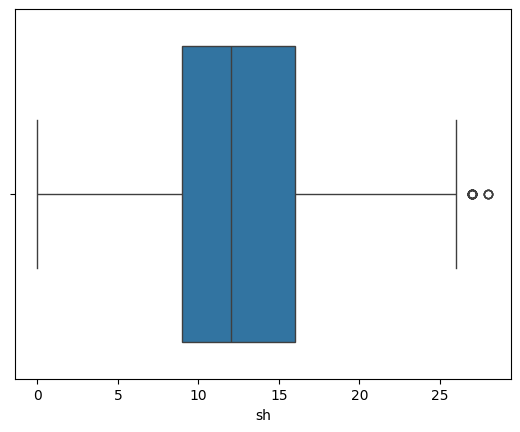

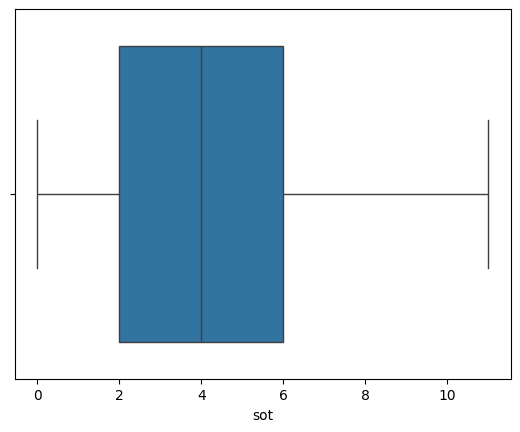

In [112]:
from scipy import stats 
#se eliminan los outliers que estan afueras de 3 desviaciones estandar
dataTrans = dataTrans[(np.abs(stats.zscore(dataTrans['gf'])) < 3)]
dataTrans = dataTrans[(np.abs(stats.zscore(dataTrans['ga'])) < 3)]
dataTrans = dataTrans[(np.abs(stats.zscore(dataTrans['xg'])) < 3)]
dataTrans = dataTrans[(np.abs(stats.zscore(dataTrans['xga'])) < 3)]
dataTrans = dataTrans[(np.abs(stats.zscore(dataTrans['sh'])) < 3)]
dataTrans = dataTrans[(np.abs(stats.zscore(dataTrans['sot'])) < 3)]

sns.boxplot(x=dataTrans['gf'])
plt.show()
sns.boxplot(x=dataTrans['ga'])
plt.show()
sns.boxplot(x=dataTrans['xg'])
plt.show()
sns.boxplot(x=dataTrans['xga'])
plt.show()
sns.boxplot(x=dataTrans['sh'])
plt.show()
sns.boxplot(x=dataTrans['sot'])
plt.show()

In [113]:
#Aplicar normalización y estandarización
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Estandarización (Z-score)
scaler = StandardScaler()
dataTrans['xg_scaled'] = scaler.fit_transform(dataTrans[['xg']])
#Normalización (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
dataTrans['xg_normalized'] = min_max_scaler.fit_transform(dataTrans[['xg']])
print(dataTrans[['xg', 'xg_scaled', 'xg_normalized']].head())

#Estandarización (Z-score)
scaler = StandardScaler()
dataTrans['xga_scaled'] = scaler.fit_transform(dataTrans[['xga']])
#Normalización (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
dataTrans['xga_normalized'] = min_max_scaler.fit_transform(dataTrans[['xga']])
print(dataTrans[['xga', 'xga_scaled', 'xga_normalized']].head())

    xg  xg_scaled  xg_normalized
0  1.9   0.724407       0.500000
1  0.9  -0.595643       0.236842
2  1.2  -0.199628       0.315789
3  1.3  -0.067623       0.342105
4  1.0  -0.463638       0.263158
   xga  xga_scaled  xga_normalized
0  0.6   -0.976222        0.162162
1  2.9    2.055684        0.783784
2  2.4    1.396574        0.648649
3  0.9   -0.580756        0.243243
4  0.3   -1.371688        0.081081


In [114]:
#creacion de nuevas variables
dataTrans['Effectiveness_f'] = dataTrans['gf'] / dataTrans['xg']
print(dataTrans[['gf', 'xg', 'Effectiveness_f']].head())
#Realizando la division de goles anotados entre goles esperados de local, se obtiene la efectividad de los goles anotados

dataTrans['Effectiveness_a'] = dataTrans['ga'] / dataTrans['xga']
print(dataTrans[['ga', 'xga', 'Effectiveness_a']].head())
#Realizando la division de goles anotados entre goles esperados de visitante, se obtiene la efectividad de los goles recibidos

dataTrans['Shot_accuracy'] = dataTrans['sot'] / dataTrans['sh']
print(dataTrans[['sot', 'sh', 'Shot_accuracy']].head())
#Realizando la division de tiros a gol entre tiros totales, se obtiene la efectividad de los tiros a gol

   gf   xg  Effectiveness_f
0   3  1.9         1.578947
1   2  0.9         2.222222
2   1  1.2         0.833333
3   1  1.3         0.769231
4   1  1.0         1.000000
   ga  xga  Effectiveness_a
0   1  0.6         1.666667
1   5  2.9         1.724138
2   1  2.4         0.416667
3   0  0.9         0.000000
4   1  0.3         3.333333
   sot  sh  Shot_accuracy
0    8  13       0.615385
1    5  16       0.312500
2    1  23       0.043478
3    5  13       0.384615
4    7  14       0.500000


In [115]:
#venue,result,team
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna 'Venue'
dataTrans['venue_encoded'] = label_encoder.fit_transform(dataTrans['venue'])
#Mostrar la simboligia de la codificacion de la columna venue
print('Simbología de la codificación de Venue')
mapping = pd.DataFrame({'venue': dataTrans['venue'], 'venue_encoded': dataTrans['venue_encoded']})
# Eliminar duplicados para mostrar solo las correspondencias únicas
mapping_unique = mapping.drop_duplicates().sort_values(by='venue_encoded')
# Mostrar la relación entre los nombres originales y los valores codificados
print(mapping_unique)

# Verificar que la columna se haya codificado correctamente
print(dataTrans[['venue', 'venue_encoded']].head())

#Aplicar Label Encoding a la columna 'Result'
dataTrans['result_encoded'] = label_encoder.fit_transform(dataTrans['result'])
#Mostrar la simboligia de la codificacion de la columna result
print('Simbología de la codificación de Resultados')
mapping = pd.DataFrame({'result': dataTrans['result'], 'result_encoded': dataTrans['result_encoded']})
# Eliminar duplicados para mostrar solo las correspondencias únicas
mapping_unique = mapping.drop_duplicates().sort_values(by='result_encoded')
# Mostrar la relación entre los nombres originales y los valores codificados
print(mapping_unique)
print(dataTrans[['result', 'result_encoded']].head())

#Aplicar Label Encoding a la columna 'Team'
dataTrans['team_encoded'] = label_encoder.fit_transform(dataTrans['team'])
#Mostrar la simboligia de la codificacion de la columna team
print('Simbología de la codificación de Team')
mapping = pd.DataFrame({'team': dataTrans['team'], 'team_encoded': dataTrans['team_encoded']})
# Eliminar duplicados para mostrar solo las correspondencias únicas
mapping_unique = mapping.drop_duplicates().sort_values(by='team_encoded')
# Mostrar la relación entre los nombres originales y los valores codificados
print(mapping_unique)



Simbología de la codificación de Venue
  venue  venue_encoded
0  Away              0
1  Home              1
  venue  venue_encoded
0  Away              0
1  Home              1
2  Away              0
3  Home              1
4  Away              0
Simbología de la codificación de Resultados
  result  result_encoded
2      D               0
1      L               1
0      W               2
  result  result_encoded
0      W               2
1      L               1
2      D               0
3      W               2
4      D               0
Simbología de la codificación de Team
                          team  team_encoded
266                    Arsenal             0
380                Aston Villa             1
1406               Bournemouth             2
1558                 Brentford             3
570   Brighton and Hove Albion             4
608                    Burnley             5
114                    Chelsea             6
494             Crystal Palace             7
342              

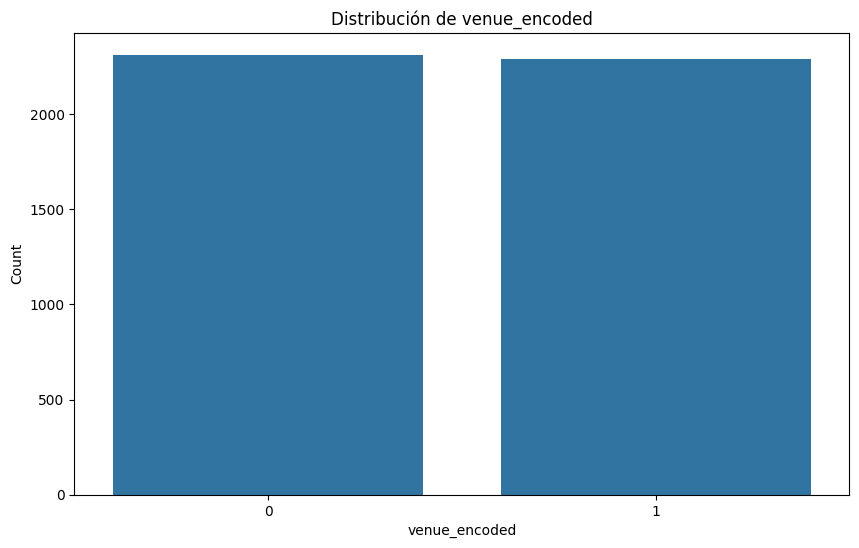

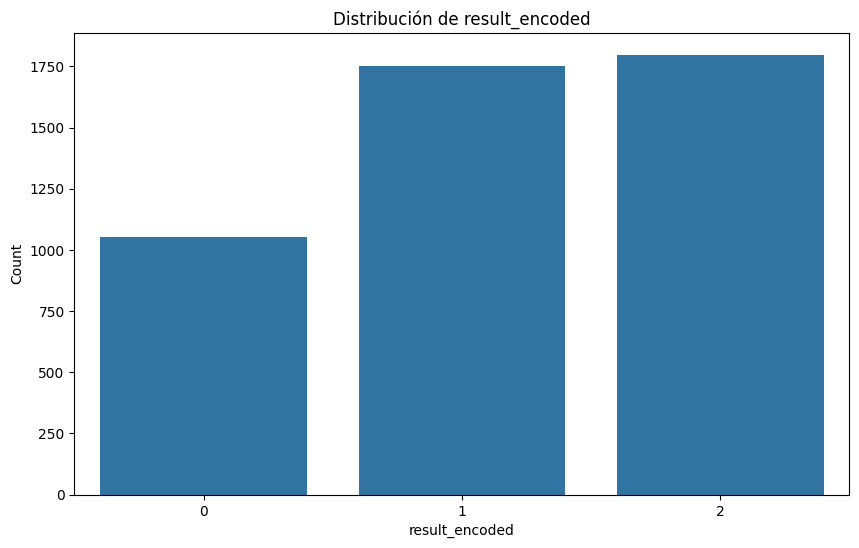

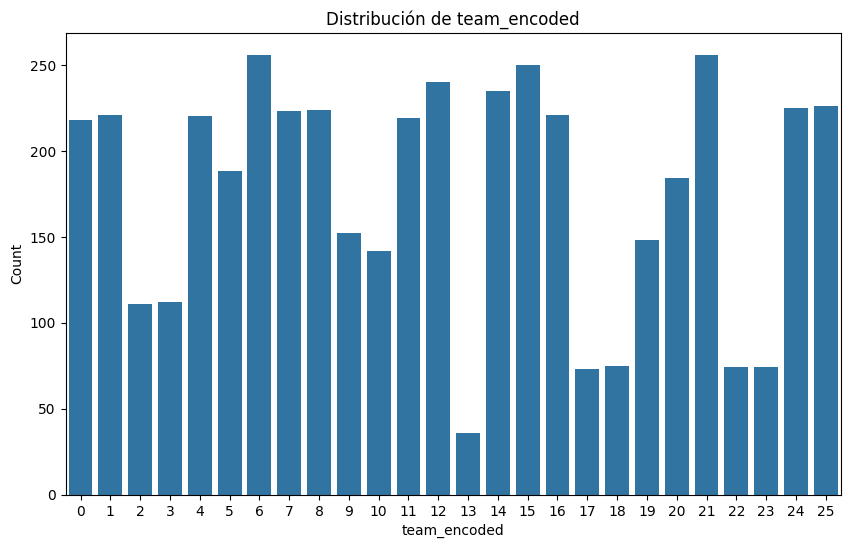

In [116]:
#venue,result,gf,ga,xg,xga,sh,sot,team

plt.figure(figsize=(10, 6))

sns.countplot(x='venue_encoded', data=dataTrans)

# Título y etiquetas
plt.title('Distribución de venue_encoded')
plt.xlabel('venue_encoded')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='result_encoded', data=dataTrans)
plt.title('Distribución de result_encoded')
plt.xlabel('result_encoded')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='team_encoded', data=dataTrans)
plt.title('Distribución de team_encoded')
plt.xlabel('team_encoded')
plt.ylabel('Count')
plt.show()


Comparacion antes y despues de preprocesar los datos


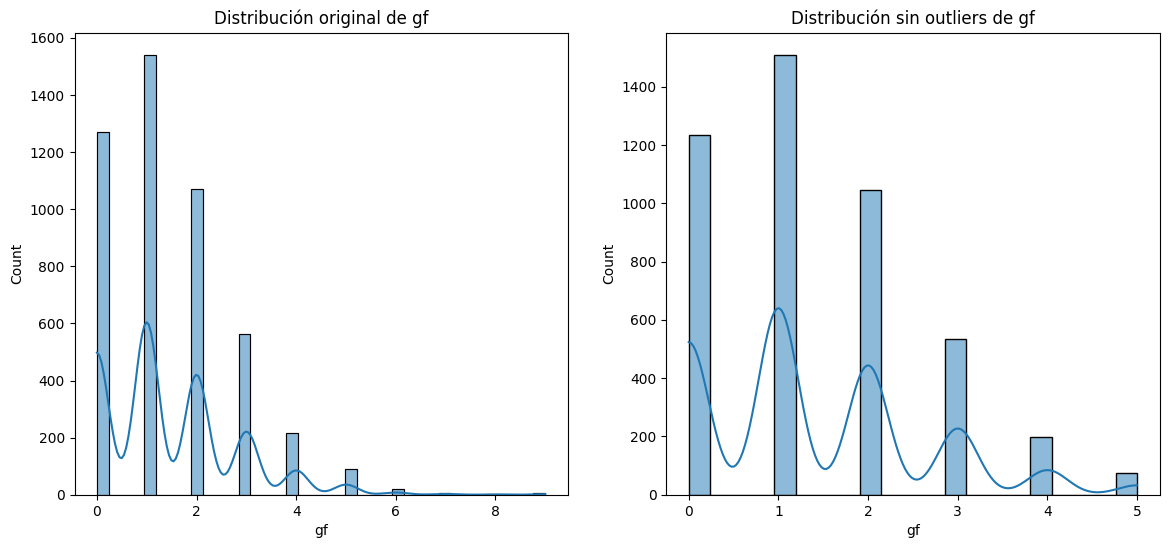

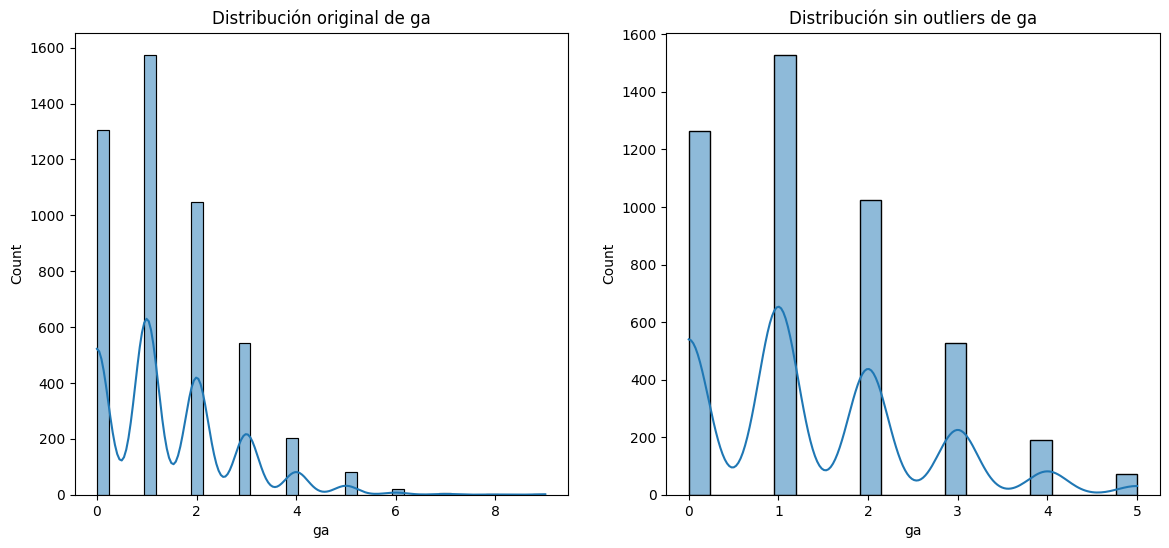

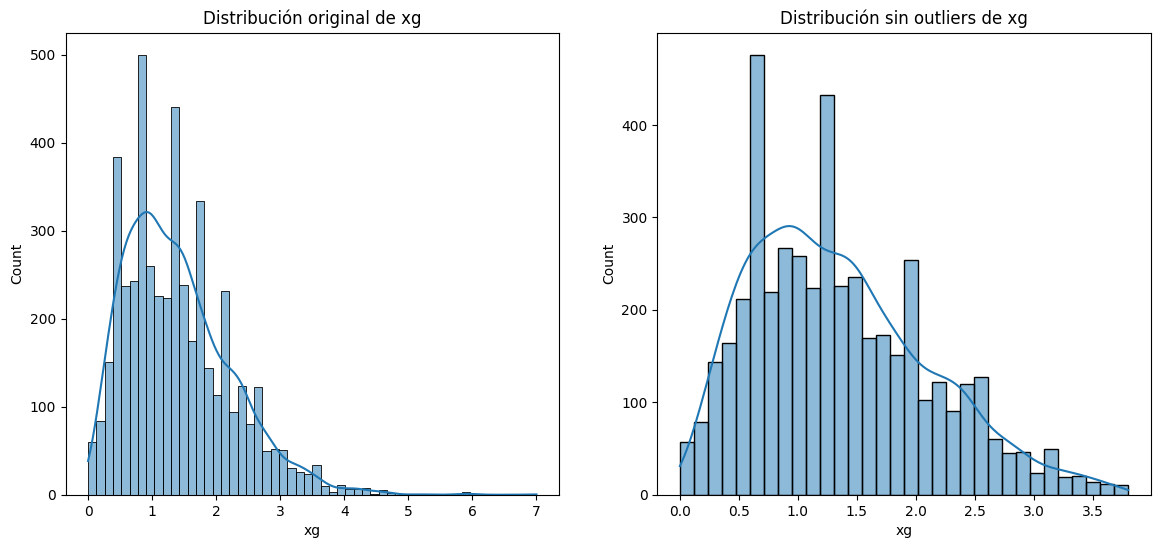

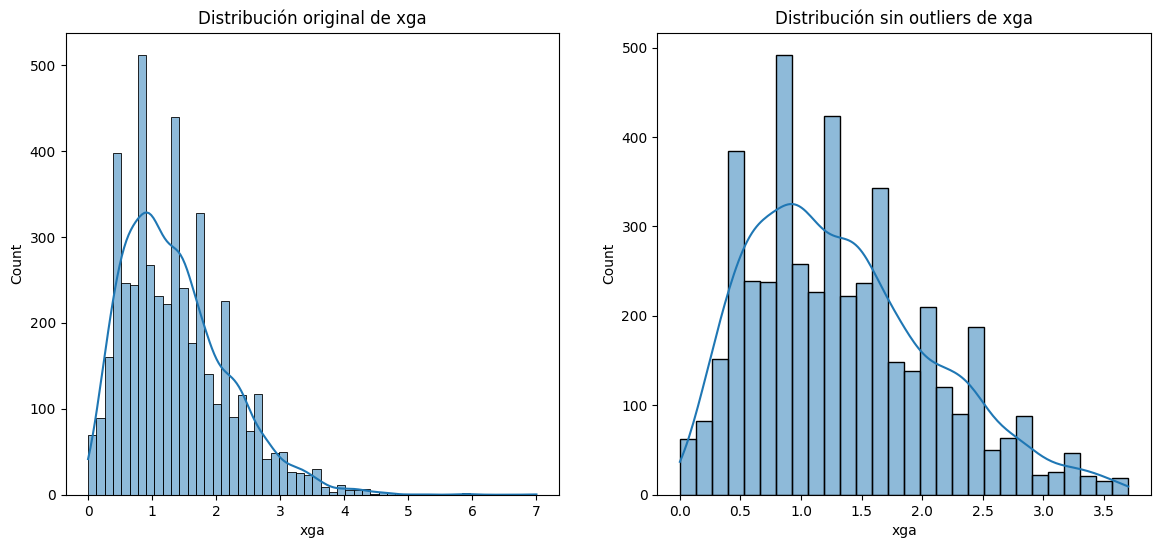

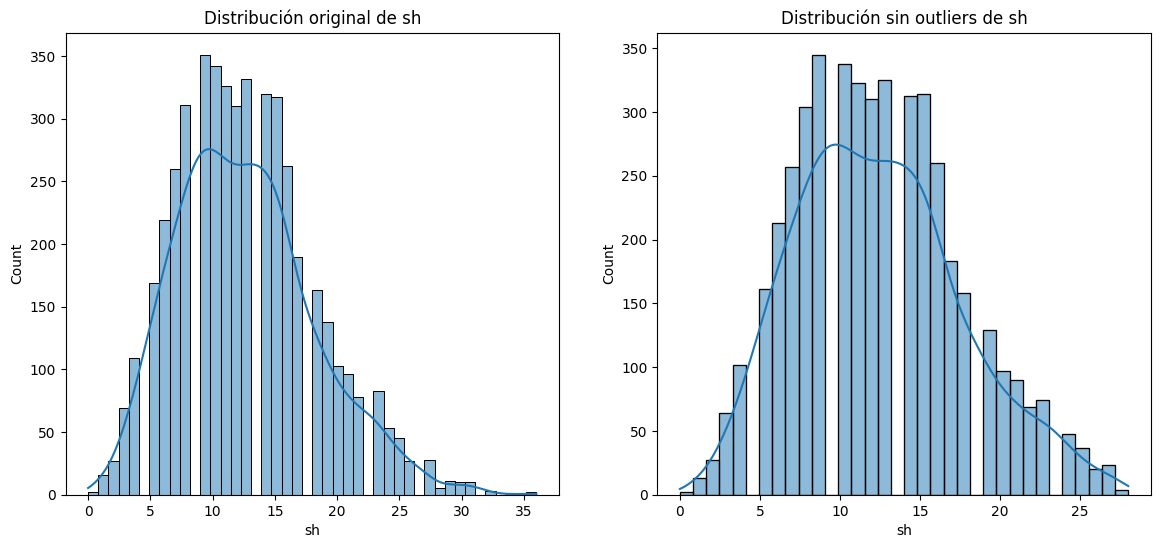

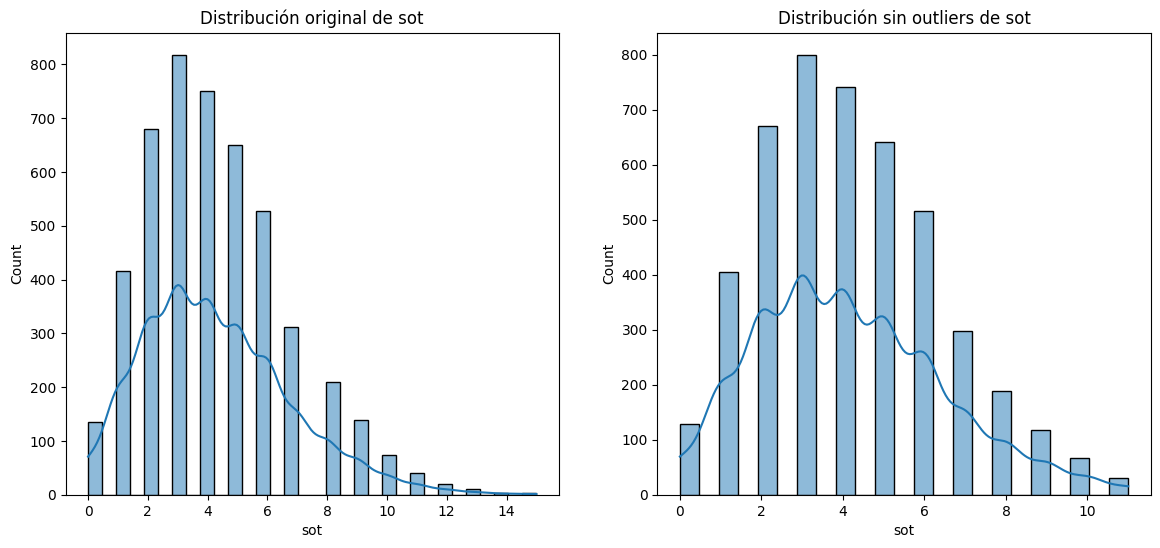

In [117]:
#xg,xga,sh,sot
#Graficar Antes y despues de preprocesamiento de datos

print('Comparacion antes y despues de preprocesar los datos')
def plot_distribution(original, no_outliers, column):
    plt.figure(figsize=(14, 6))

    # Gráfico de la variable original
    plt.subplot(1, 2, 1)
    sns.histplot(original, kde=True)
    plt.title(f'Distribución original de {column}')

    # Gráfico de la variable sin outliers
    plt.subplot(1, 2, 2)
    sns.histplot(no_outliers, kde=True)
    plt.title(f'Distribución sin outliers de {column}')
    
    plt.show()

# Definir las columnas que vamos a graficar
columnas = ['gf', 'ga', 'xg', 'xga','sh','sot']

# Iterar sobre las columnas y generar los gráficos
for columna in columnas:
    plot_distribution(df[columna], dataTrans[columna], columna)

In [118]:
#Comparar los datos antes y después del preprocesamiento.

print("Antes del preprocesamiento:")
print(df.describe())
print("Después del preprocesamiento:")
print(dataTrans.describe())


Antes del preprocesamiento:
        Unnamed: 0           gf           ga           xg          xga  \
count  4788.000000  4788.000000  4788.000000  4788.000000  4788.000000   
mean     63.044069     1.447995     1.405388     1.396512     1.364745   
std      42.865191     1.312635     1.286927     0.828847     0.814947   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      28.000000     0.000000     0.000000     0.800000     0.700000   
50%      62.000000     1.000000     1.000000     1.300000     1.200000   
75%      87.000000     2.000000     2.000000     1.900000     1.800000   
max     182.000000     9.000000     9.000000     7.000000     7.000000   

              poss    attendance  notes           sh          sot  \
count  4788.000000   3155.000000    0.0  4788.000000  4788.000000   
mean     50.432957  38397.586688    NaN    12.619256     4.261278   
std      12.810958  17595.849137    NaN     5.548444     2.459963   
min      18.000000   2000.000

In [119]:
def print_summary():
    print("Antes del preprocesamiento:")
    print("-" * 80)
    print("Este es el resumen estadístico del dataset original, donde las columnas principales")
    print("(como 'gf', 'ga', 'xg', etc.) no han sido limpiadas ni transformadas. Los valores que se ven son:")
    print()
    print("count: El número de registros disponibles para cada columna. Por ejemplo, hay 4788 registros")
    print("en la mayoría de las columnas, pero algunas, como 'attendance', tienen menos (3155).")
    print()
    print("mean: El promedio de los valores. Por ejemplo, el promedio de goles a favor ('gf') es 1.44")
    print("y el promedio de goles en contra ('ga') es 1.40.")
    print()
    print("std: Desviación estándar, que indica la dispersión de los datos respecto al promedio.")
    print("Por ejemplo, la desviación estándar de 'gf' es 1.31, lo que significa que hay cierta")
    print("variabilidad en el número de goles marcados.")
    print()
    print("min, 25%, 50%, 75%, max: Estos son los valores mínimos, percentiles (25%, 50%, 75%) y el")
    print("valor máximo de cada columna. Estos te ayudan a entender la distribución")
    print("de los datos. Por ejemplo, el 50% (mediana) de los goles a favor es 1,")
    print("y el valor máximo es 9.")
    print("-" * 80)
    
    print("Después del preprocesamiento:")
    print("-" * 80)
    print("Los datos han sido procesados para eliminar outliers y realizar transformaciones adicionales. ")
    print("Las estadísticas después del preprocesamiento son ligeramente diferentes debido a estas acciones:")
    
    print()
    print("Reducción en la cantidad de datos: La cantidad de registros ('count') ha disminuido de 4788")
    print("a 4603 en la mayoría de las columnas. Esto indica que algunos valores extremos (outliers)")
    print("fueron eliminados.")
    print()
    print("Reducción de las desviaciones estándar ('std'): Las desviaciones estándar son menores en el")
    print("dataset preprocesado, lo que significa que los valores están más cerca del promedio. ")
    print("Por ejemplo, la desviación")
    print("estándar de 'gf' baja de 1.31 a 1.21, lo que sugiere")
    print("que el rango de los goles marcados es ahora más consistente.")
    print()
    print("Máximos más bajos: Algunos valores máximos han sido recortados. Por ejemplo, el valor máximo de")
    print("'gf' (goles a favor) pasa de 9 a 5, y en 'xg' (expected goals) pasa de 7 a 3.8.")
    print("Esto se debe a la eliminación de outliers extremos.")
    print("-" * 80)

    print("Nuevas columnas añadidas tras el preprocesamiento:")
    print("-" * 80)
    print("xg_normalized y xga_normalized: Son versiones normalizadas de las columnas 'xg' y 'xga'. Los")
    print("valores de estas columnas han sido escalados a un rango común (entre")
    print("0 y 1), lo que es útil para comparaciones y modelos de machine learning.")
    print()
    print("Effectiveness_f, Effectiveness_a: Estas columnas calculan la efectividad de")
    print("goles a favor y goles en contra. El valor máximo de 'Effectiveness'")
    print("es 20, lo que podría indicar un partido con una gran efectividad de parte de uno de los equipos.")
    print()
    print("Shot_accuracy: Representa la precisión de los tiros, con un valor medio de 34.2%. Los equipos con")
    print("partidos más precisos tienen un valor de 1 (100% de precisión), mientras que los menos precisos")
    print("están en 0.")
    print()
    print("result_encoded, team_encoded: Estas son columnas codificadas de las variables categóricas 'result'")
    print("y 'team'. El 'result' y el 'team' han sido transformados en valores numéricos, donde:")
    print("- result_encoded: 0 es 'derrota', 1 es 'empate', y 2 es 'victoria'.")
    print("- team_encoded: Asigna un número a cada equipo en el dataset, entre 0 y 25.")
    print("-" * 80)

# Llamar a la función para mostrar el resumen
print_summary()


Antes del preprocesamiento:
--------------------------------------------------------------------------------
Este es el resumen estadístico del dataset original, donde las columnas principales
(como 'gf', 'ga', 'xg', etc.) no han sido limpiadas ni transformadas. Los valores que se ven son:

count: El número de registros disponibles para cada columna. Por ejemplo, hay 4788 registros
en la mayoría de las columnas, pero algunas, como 'attendance', tienen menos (3155).

mean: El promedio de los valores. Por ejemplo, el promedio de goles a favor ('gf') es 1.44
y el promedio de goles en contra ('ga') es 1.40.

std: Desviación estándar, que indica la dispersión de los datos respecto al promedio.
Por ejemplo, la desviación estándar de 'gf' es 1.31, lo que significa que hay cierta
variabilidad en el número de goles marcados.

min, 25%, 50%, 75%, max: Estos son los valores mínimos, percentiles (25%, 50%, 75%) y el
valor máximo de cada columna. Estos te ayudan a entender la distribución
de los da